<a href="https://colab.research.google.com/github/Rahul21sai/DL_projects/blob/main/FACE_DETECTION_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEPLEARNING PROJECT**

BINARY CLASSIFICATION PROBLEM

In [1]:
!pip install kaggle

-->we are trying to get the data set through api as the data set is large

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# api to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 157M/163M [00:00<00:00, 212MB/s]
100% 163M/163M [00:01<00:00, 164MB/s]


In [4]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


****IMPORTING THE DEPENDENCIES****

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2291.jpg', 'with_mask_2105.jpg', 'with_mask_3603.jpg', 'with_mask_533.jpg', 'with_mask_2005.jpg']
['with_mask_2676.jpg', 'with_mask_1074.jpg', 'with_mask_662.jpg', 'with_mask_2637.jpg', 'with_mask_1013.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2043.jpg', 'without_mask_3414.jpg', 'without_mask_1940.jpg', 'without_mask_3631.jpg', 'without_mask_2640.jpg']
['without_mask_2251.jpg', 'without_mask_1422.jpg', 'without_mask_2920.jpg', 'without_mask_1802.jpg', 'without_mask_3746.jpg']


In [9]:
print('number of with mask images:',len(with_mask_files))
print('number of without mask images:',len(without_mask_files))

number of with mask images: 3725
number of without mask images: 3828


**creating the labels for the with mask and with out mask**

with mask -->1
without mask -->0

In [10]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828


In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

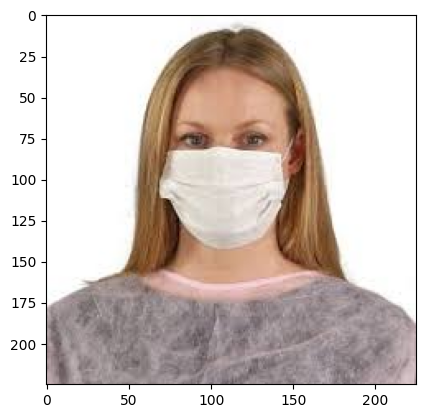

In [14]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2291.jpg')
imgplot = plt.imshow(img)
plt.show()

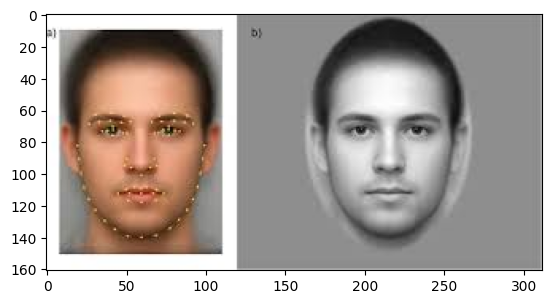

In [15]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2043.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image processing**

1.resize the images
2.convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+
with_mask_path = '/content/data/with_mask/'

data = []
for img_file in with_mask_files:


  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:


  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[188, 169, 173],
        [183, 163, 168],
        [168, 151, 155],
        ...,
        [213, 194, 198],
        [214, 195, 199],
        [199, 180, 184]],

       [[190, 171, 175],
        [184, 165, 169],
        [172, 155, 158],
        ...,
        [212, 193, 197],
        [212, 193, 198],
        [189, 170, 174]],

       [[192, 172, 176],
        [190, 170, 174],
        [179, 159, 163],
        ...,
        [216, 196, 199],
        [214, 195, 198],
        [184, 165, 169]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list into numpy array

x = np.array(data)
y = np.array(labels)

In [23]:
type(x)
print(x.shape)

(7553, 128, 128, 3)


In [24]:
type(y)
print(y.shape)

(7553,)


****train test split****

In [25]:
#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [27]:
#scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [28]:
x_train[0]

array([[[165, 181, 186],
        [165, 181, 186],
        [165, 181, 186],
        ...,
        [133, 128, 125],
        [133, 128, 125],
        [133, 128, 125]],

       [[164, 179, 184],
        [164, 179, 184],
        [164, 179, 184],
        ...,
        [132, 127, 124],
        [132, 127, 124],
        [132, 127, 124]],

       [[163, 176, 182],
        [163, 176, 182],
        [163, 176, 182],
        ...,
        [132, 127, 123],
        [131, 126, 122],
        [131, 126, 122]],

       ...,

       [[ 57,  75,  95],
        [ 56,  74,  94],
        [ 56,  74,  94],
        ...,
        [ 40,  43,  50],
        [ 40,  43,  50],
        [ 41,  44,  51]],

       [[ 57,  75,  95],
        [ 56,  74,  94],
        [ 56,  74,  94],
        ...,
        [ 40,  43,  50],
        [ 40,  43,  50],
        [ 41,  44,  51]],

       [[ 57,  75,  95],
        [ 56,  74,  94],
        [ 56,  74,  94],
        ...,
        [ 40,  43,  50],
        [ 40,  43,  50],
        [ 41,  44,  51]]

In [29]:
x_train_scaled[0]

array([[[0.64705882, 0.70980392, 0.72941176],
        [0.64705882, 0.70980392, 0.72941176],
        [0.64705882, 0.70980392, 0.72941176],
        ...,
        [0.52156863, 0.50196078, 0.49019608],
        [0.52156863, 0.50196078, 0.49019608],
        [0.52156863, 0.50196078, 0.49019608]],

       [[0.64313725, 0.70196078, 0.72156863],
        [0.64313725, 0.70196078, 0.72156863],
        [0.64313725, 0.70196078, 0.72156863],
        ...,
        [0.51764706, 0.49803922, 0.48627451],
        [0.51764706, 0.49803922, 0.48627451],
        [0.51764706, 0.49803922, 0.48627451]],

       [[0.63921569, 0.69019608, 0.71372549],
        [0.63921569, 0.69019608, 0.71372549],
        [0.63921569, 0.69019608, 0.71372549],
        ...,
        [0.51764706, 0.49803922, 0.48235294],
        [0.51372549, 0.49411765, 0.47843137],
        [0.51372549, 0.49411765, 0.47843137]],

       ...,

       [[0.22352941, 0.29411765, 0.37254902],
        [0.21960784, 0.29019608, 0.36862745],
        [0.21960784, 0

**Buliding a CNN**

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [33]:
#training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs = 50)

Epoch 1/50
170/170 [==============================] - 18s 28ms/step - loss: 0.4657 - acc: 0.7977 - val_loss: 0.3141 - val_acc: 0.8777
Epoch 2/50
170/170 [==============================] - 3s 17ms/step - loss: 0.2824 - acc: 0.8924 - val_loss: 0.2317 - val_acc: 0.8992
Epoch 3/50
170/170 [==============================] - 3s 17ms/step - loss: 0.2298 - acc: 0.9097 - val_loss: 0.2420 - val_acc: 0.8843
Epoch 4/50
170/170 [==============================] - 3s 19ms/step - loss: 0.1832 - acc: 0.9294 - val_loss: 0.2108 - val_acc: 0.9140
Epoch 5/50
170/170 [==============================] - 3s 18ms/step - loss: 0.1648 - acc: 0.9415 - val_loss: 0.1897 - val_acc: 0.9289
Epoch 6/50
170/170 [==============================] - 3s 17ms/step - loss: 0.1460 - acc: 0.9421 - val_loss: 0.2240 - val_acc: 0.9223
Epoch 7/50
170/170 [==============================] - 3s 20ms/step - loss: 0.1258 - acc: 0.9535 - val_loss: 0.2769 - val_acc: 0.8992
Epoch 8/50
170/170 [==============================] - 3s 17ms/step -

**MODEL EVALUATION**

In [34]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('test accuracy =',accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.5008 - acc: 0.9418
test accuracy = 0.9417604207992554


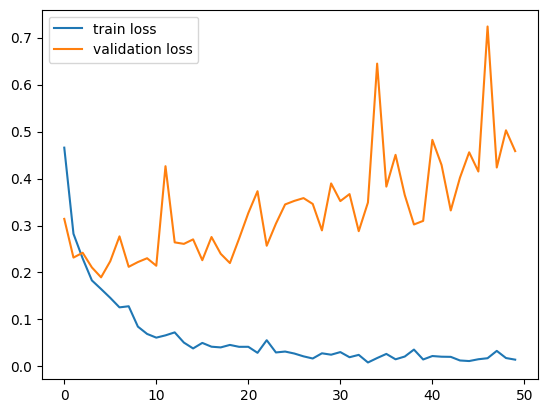

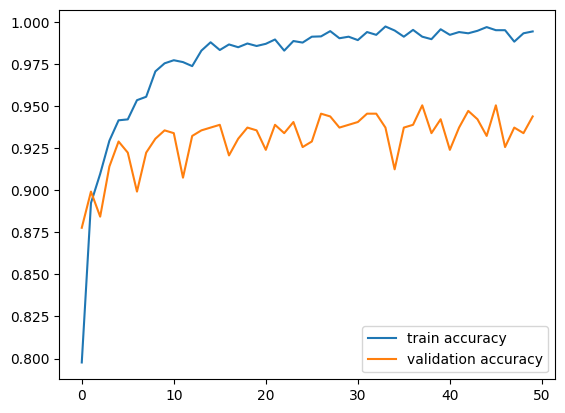

In [35]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



**predicitive system**

path of the image to be predicted:/content/test.jpeg


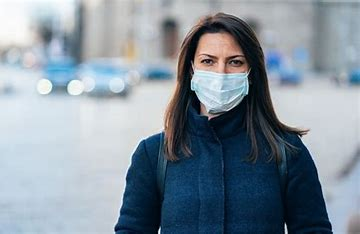

1/1 [==============================] - 0s 179ms/step
[[0.01909939 0.9999995 ]]
1
the person in the image is wearing a mask


In [36]:
input_image_path = input("path of the image to be predicted:")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled= input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print("the person in the image is wearing a mask")

else:

  print("the person in the image is not wearing a mask")

path of the image to be predicted:/content/test1.jpeg


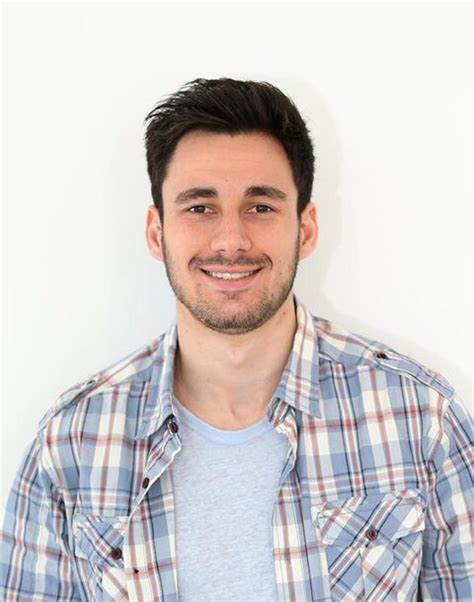

1/1 [==============================] - 0s 29ms/step
[[0.48873827 0.4148823 ]]
0
the person in the image is not wearing a mask


In [37]:
input_image_path = input("path of the image to be predicted:")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled= input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print("the person in the image is wearing a mask")

else:

  print("the person in the image is not wearing a mask")